In [166]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [167]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
adata = sc.datasets.pbmc3k()

In [169]:
sc.pp.filter_cells(adata, min_counts=500)

In [170]:
sc.pp.filter_genes(adata, min_cells=50)

In [171]:
adata_tmp  = adata.copy()
sc.pp.normalize_total(adata_tmp)
sc.pp.log1p(adata_tmp)
sc.pp.pca(adata_tmp)
sc.pp.neighbors(adata_tmp)
sc.tl.leiden(adata_tmp, resolution=1)

In [172]:
adata.obs['leiden'] = adata_tmp.obs.leiden

In [173]:
adata.obs.groupby('leiden').size()

leiden
0    568
1    553
2    377
3    362
4    345
5    276
6    155
7     53
8     11
dtype: int64

In [174]:
adata = adata[adata.obs.leiden != '8']

In [175]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [176]:
X, sf, clust_sf_scaled, scale_factors = sc.pp.normalize_scran(
    adata, 
    clusters='leiden',
    positive=True,
    key_added='size_factors',
    inplace=False,
    debug=True,
)

468 568
460 553
244 377
319 362
238 345
219 276
125 155
37 53


/Users/carlo_dedonno/Projects/scanpy/scanpy/preprocessing/_normalize_scran.py:258: RuntimeWarning: divide by zero encountered in true_divide
  clust = clust[to_use]


In [177]:
scale_factors

array([1.        , 0.71171671, 0.61818475, 0.64422452, 0.55592853,
       1.77331781, 0.74693203, 5.45612526])

/Users/carlo_dedonno/opt/anaconda3/envs/scran/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 5.0)

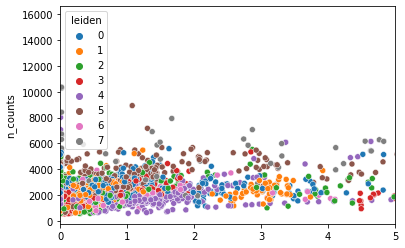

In [178]:
sns.scatterplot(sf, adata.obs.n_counts, hue=adata.obs.leiden)
plt.xlim([0, 5])

In [180]:
v = [
    [0, 1, 2],
    [0, 1]
]

In [182]:
np.repeat([1, 0.1], [len(v[0]), len(v[1])])

array([1. , 1. , 1. , 0.1, 0.1])

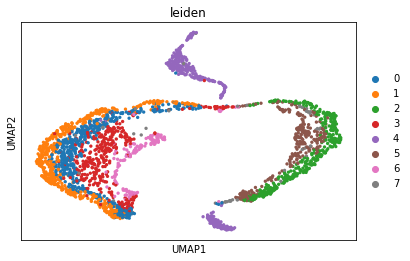

In [179]:
adata_norm = adata.copy()
adata_norm.obs['n_counts'] = adata_norm.X.sum(axis=1)
adata_norm.X = X
sc.pp.log1p(adata_norm)
sc.pp.pca(adata_norm)
sc.pp.neighbors(adata_norm)
sc.tl.umap(adata_norm)
sc.pl.umap(adata_norm, color='leiden')

In [193]:
adata_norm.obs['size_factors'] =sf

In [192]:
sf[sf>2] = 2

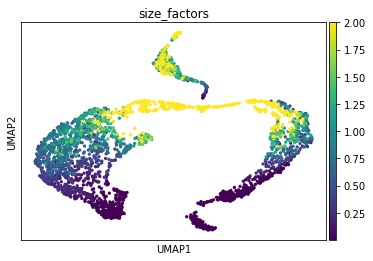

In [194]:
sc.pl.umap(adata_norm, color='size_factors')

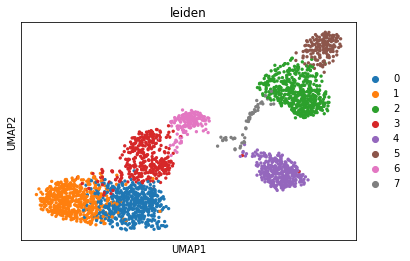

In [100]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='leiden')